In [5]:
import scipy.stats as scs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('aces_2020.csv')
cole = df[df.pitcher==543037]
degrom = df[df.pitcher==594798]

In [3]:
c = cole.groupby('pitch_type')
d = degrom.groupby('pitch_type')

ps = ['CH','CU','FF','SL']
avg_cats = ['release_speed', 'release_spin_rate','pfx_x',
            'pfx_z','vx0','vy0','vz0','ax','ay','az']

agg = pd.concat([c.agg('sum')[ps].sum(axis=1),
                d.agg('sum')[ps].sum(axis=1)], axis=1).rename(columns={0: "Cole", 1: "deGrom"})

cole_mean = c.agg('mean')[avg_cats]
degr_mean = d.agg('mean')[avg_cats]

In [20]:
ff_mean_spin = cole_mean.release_spin_rate['FF']

pitch_type
CH    1750.223881
CU    2802.782609
FF    2505.105512
SL    2580.374150
Name: release_spin_rate, dtype: float64

In [26]:
degr_ff = degrom[degrom.pitch_type=='FF']
cole_ff = cole[cole.pitch_type=='FF']

degr_sl = degrom[degrom.pitch_type=='SL']
cole_sl = cole[cole.pitch_type=='SL']

degr_cu = degrom[degrom.pitch_type=='CU']
cole_cu = cole[cole.pitch_type=='CU']

degr_ch = degrom[degrom.pitch_type=='CH']
cole_ch = cole[cole.pitch_type=='CH']

(Ttest_indResult(statistic=3.899203918125098, pvalue=0.00010539824654217182),
 'Cole: 2505.1055118110235',
 'deGrom: 2477.0019607843137')

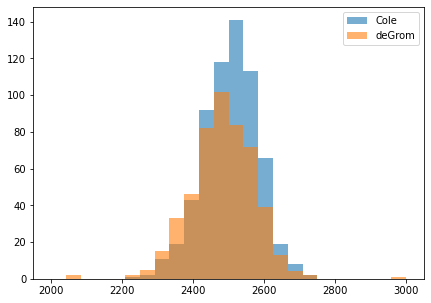

In [57]:
#Hypothesis test of fastball spin. Use mean spin rate.
fig, ax = plt.subplots(figsize=(7,5))
x=np.linspace(2000, 3000, 25)
ax.hist(cole_ff.release_spin_rate, alpha=.6, bins=x, label='Cole')
ax.hist(degr_ff.release_spin_rate, alpha=.6, bins=x, label='deGrom')
ax.legend()

ff_mean_spin_co = cole_mean.release_spin_rate['FF']
ff_mean_spin_de = degr_mean.release_spin_rate['FF']
ff_spin_res = scs.ttest_ind(cole_ff.release_spin_rate, degr_ff.release_spin_rate, equal_var=False)
(result, f'Cole: {ff_mean_spin_co}', f'deGrom: {ff_mean_spin_de}')

(Ttest_indResult(statistic=3.899203918125098, pvalue=0.00010539824654217182),
 96.71007874015744)

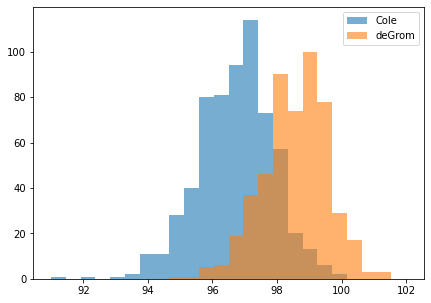

In [35]:
#Hypothesis test of fastball speed. Use mean spin rate.
fig, ax = plt.subplots(figsize=(7,5))
x=np.linspace(91, 102, 25)
ax.hist(cole_ff.release_speed, alpha=.6, bins=x, label='Cole')
ax.hist(degr_ff.release_speed, alpha=.6, bins=x, label='deGrom')
ax.legend()

ff_mean_speed_co = cole_mean.release_speed['FF']
ff_mean_speed_de = degr_mean.release_speed['FF']
ff_spin_res = scs.ttest_ind(cole_ff.release_speed, degr_ff.release_speed, equal_var=False)
(result, ff_mean_spin)
(result, f'Cole: {ff_mean_spin_co}', f'deGrom: {ff_mean_spin_de}')

(Ttest_indResult(statistic=3.899203918125098, pvalue=0.00010539824654217182),
 -1.0179527559055115)

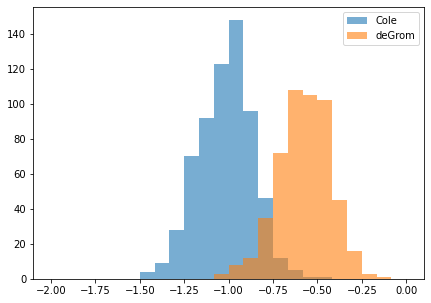

In [48]:
#Hypothesis test of fastball break. Use mean spin rate.
fig, ax = plt.subplots(figsize=(7,5))
x=np.linspace(-2, 0, 25)
ax.hist(cole_ff.pfx_x, alpha=.6, bins=x, label='Cole')
ax.hist(degr_ff.pfx_x, alpha=.6, bins=x, label='deGrom')
ax.legend()

ff_mean_break = cole_mean.pfx_x['FF']
ff_break_res = scs.ttest_ind(cole_ff.pfx_x, degr_ff.pfx_x, equal_var=False)
(result, ff_mean_break)

(Ttest_indResult(statistic=3.899203918125098, pvalue=0.00010539824654217182),
 1.490787401574804)

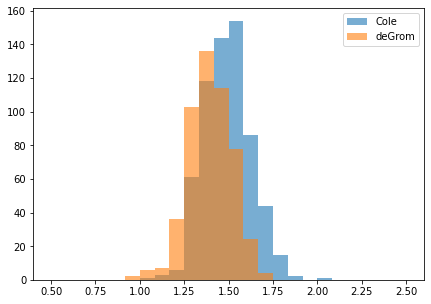

In [51]:
#Hypothesis test of fastball rise. Use mean spin rate.
fig, ax = plt.subplots(figsize=(7,5))
x=np.linspace(.5, 2.5, 25)
ax.hist(cole_ff.pfx_z, alpha=.6, bins=x, label='Cole')
ax.hist(degr_ff.pfx_z, alpha=.6, bins=x, label='deGrom')
ax.legend()

ff_mean_break2 = cole_mean.pfx_z['FF']
ff_break2_res = scs.ttest_ind(cole_ff.pfx_z, degr_ff.pfx_z, equal_var=False)
(result, ff_mean_break2)

(Ttest_indResult(statistic=3.899203918125098, pvalue=0.00010539824654217182),
 2580.374149659864)

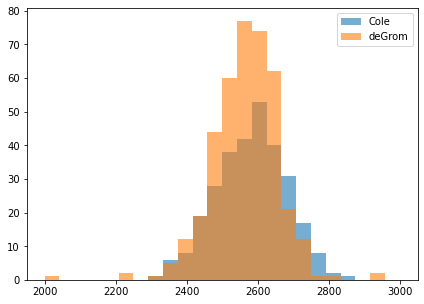

In [31]:
#Hypothesis test of slider spin. Use mean spin rate.
fig, ax = plt.subplots(figsize=(7,5))
x=np.linspace(2000, 3000, 25)
ax.hist(cole_sl.release_spin_rate, alpha=.6, bins=x, label='Cole')
ax.hist(degr_sl.release_spin_rate, alpha=.6, bins=x, label='deGrom')
ax.legend()

sl_mean_spin = cole_mean.release_spin_rate['SL']
sl_spin_res = scs.ttest_ind(cole_sl.release_spin_rate, degr_sl.release_spin_rate, equal_var=False)
(result, sl_mean_spin)

(Ttest_indResult(statistic=3.899203918125098, pvalue=0.00010539824654217182),
 88.7336734693878)

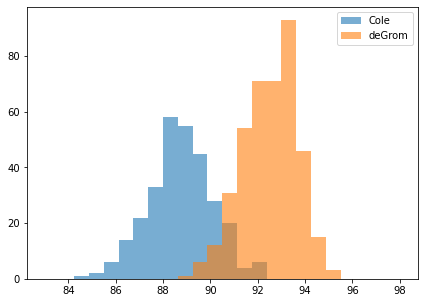

In [34]:
#Hypothesis test of slider speed. Use mean spin rate.
fig, ax = plt.subplots(figsize=(7,5))
x=np.linspace(83, 98, 25)
ax.hist(cole_sl.release_speed, alpha=.6, bins=x, label='Cole')
ax.hist(degr_sl.release_speed, alpha=.6, bins=x, label='deGrom')
ax.legend()

sl_mean_spin = cole_mean.release_speed['SL']
sl_spin_res = scs.ttest_ind(cole_sl.release_speed, degr_sl.release_speed, equal_var=False)
(result, sl_mean_spin)

(Ttest_indResult(statistic=3.899203918125098, pvalue=0.00010539824654217182),
 0.42125850340136034)

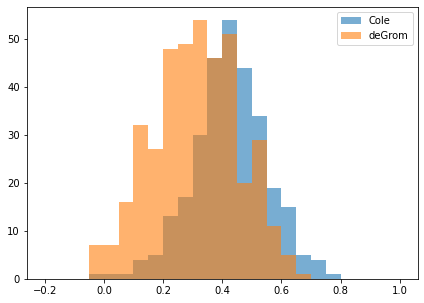

In [46]:
#Hypothesis test of slider break. Use mean spin rate.
fig, ax = plt.subplots(figsize=(7,5))
x=np.linspace(-.2, 1, 25)
ax.hist(cole_sl.pfx_x, alpha=.6, bins=x, label='Cole')
ax.hist(degr_sl.pfx_x, alpha=.6, bins=x, label='deGrom')
ax.legend()

sl_mean_break = cole_mean.pfx_x['SL']
sl_break_res = scs.ttest_ind(cole_sl.pfx_x, degr_sl.pfx_x, equal_var=False)
(result, sl_mean_break)

(Ttest_indResult(statistic=3.899203918125098, pvalue=0.00010539824654217182),
 0.2941496598639456)

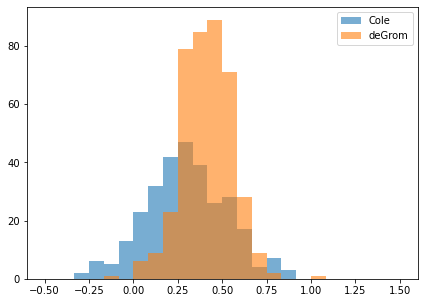

In [55]:
#Hypothesis test of slider drop. Use mean spin rate.
fig, ax = plt.subplots(figsize=(7,5))
x=np.linspace(-.5, 1.5, 25)
ax.hist(cole_sl.pfx_z, alpha=.6, bins=x, label='Cole')
ax.hist(degr_sl.pfx_z, alpha=.6, bins=x, label='deGrom')
ax.legend()

sl_mean_break2 = cole_mean.pfx_z['SL']
sl_break2_res = scs.ttest_ind(cole_sl.pfx_z, degr_sl.pfx_z, equal_var=False)
(result, sl_mean_break2)